# 📌 PowerCast - Neural Network-Based Prediction and Forecasting of Data Center Energy Consumption

## 🔹 Project Description
- The goal of this project is to predict and forecast **data center energy consumption** using deep learning models.  
- Accurate predictions help optimize energy usage, reduce costs, and improve sustainability in large-scale IT operations.

In [102]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os

### ✅ 📂 1. Load & Inspect Data
- Imported dataset related to energy consumption.
- Checked structure, missing values, and data types.
- Conducted initial exploration of numerical and time-related features.

In [2]:
df = pd.read_csv('allDataMean.csv')

In [3]:
rename_map = {
    "allDataMean1": "Week",
    "allDataMean2": "Voltage_V",
    "allDataMean3": "Current_A",
    "allDataMean4": "Power_W",
    "allDataMean5": "Frequency_Hz",
    "allDataMean6": "Active_Energy_kWh",
    "allDataMean7": "Power_Factor",
    "allDataMean8": "ESP32_Temperature_C",
    "allDataMean9": "CPU_Consumption_pct",
    "allDataMean10": "CPU_Power_Consumption_pct",
    "allDataMean11": "CPU_Temperature_C",
    "allDataMean12": "GPU_Consumption_pct",
    "allDataMean13": "GPU_Power_Consumption_pct",
    "allDataMean14": "GPU_Temperature_C",
    "allDataMean15": "RAM_Consumption_pct",
    "allDataMean16": "RAM_Power_Consumption_pct"
}

df = df.rename(columns=rename_map)

In [4]:
df.head()

,Week,Voltage_V,Current_A,Power_W,Frequency_Hz,Active_Energy_kWh,Power_Factor,ESP32_Temperature_C,CPU_Consumption_pct,CPU_Power_Consumption_pct,CPU_Temperature_C,GPU_Consumption_pct,GPU_Power_Consumption_pct,GPU_Temperature_C,RAM_Consumption_pct,RAM_Power_Consumption_pct
0,3.327869,120.006557,0.968525,101.468852,59.978689,0.380328,0.873279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.000000,120.006557,0.972787,102.250820,59.990164,0.006230,0.876230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.000000,120.037705,0.958689,100.242623,60.000000,0.020000,0.870328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.000000,120.027869,0.944262,98.113115,59.963934,0.020000,0.865246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.000000,120.037705,0.943115,97.857377,59.967213,0.020000,0.863115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.describe()

,Week,Voltage_V,Current_A,Power_W,Frequency_Hz,Active_Energy_kWh,Power_Factor,ESP32_Temperature_C,CPU_Consumption_pct,CPU_Power_Consumption_pct,CPU_Temperature_C,GPU_Consumption_pct,GPU_Power_Consumption_pct,GPU_Temperature_C,RAM_Consumption_pct,RAM_Power_Consumption_pct
count,184426.000000,184426.000000,184426.000000,184426.000000,184426.000000,184426.000000,184426.000000,184426.000000,184426.000000,184426.000000,184426.000000,184426.000000,184426.000000,184426.000000,184426.000000,184426.000000
mean,4.103395,120.021228,0.820289,87.187038,59.964679,122.334941,0.860265,24.100945,1.996956,11.359958,8.665053,0.035802,10.114905,3.892158,14.775249,2.428889
std,1.988288,0.270607,0.227190,25.488845,0.023111,82.832466,0.139007,15.902589,3.183677,17.367542,13.393789,0.184194,15.469822,6.125859,18.447626,3.870338
min,1.000000,118.265574,0.020000,0.000000,59.800000,0.006230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,120.000000,0.686393,77.095082,59.949180,43.000287,0.860000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,120.052459,0.922131,94.952459,59.967213,127.970000,0.895410,31.904508,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,120.122951,0.941967,97.831148,59.981967,180.066148,0.904098,33.844098,4.678975,36.920000,26.393443,0.000000,33.000000,8.210820,35.816352,6.537008
max,7.000000,120.522951,1.402623,156.755738,60.067213,432.503377,0.971311,53.333300,44.016393,44.581148,56.442623,8.737705,38.442623,25.008689,54.904918,17.512131


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184426 entries, 0 to 184425
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Week                       184426 non-null  float64
 1   Voltage_V                  184426 non-null  float64
 2   Current_A                  184426 non-null  float64
 3   Power_W                    184426 non-null  float64
 4   Frequency_Hz               184426 non-null  float64
 5   Active_Energy_kWh          184426 non-null  float64
 6   Power_Factor               184426 non-null  float64
 7   ESP32_Temperature_C        184426 non-null  float64
 8   CPU_Consumption_pct        184426 non-null  float64
 9   CPU_Power_Consumption_pct  184426 non-null  float64
 10  CPU_Temperature_C          184426 non-null  float64
 11  GPU_Consumption_pct        184426 non-null  float64
 12  GPU_Power_Consumption_pct  184426 non-null  float64
 13  GPU_Temperature_C          18

In [7]:
df.columns

Index(['Week', 'Voltage_V', 'Current_A', 'Power_W', 'Frequency_Hz',
       'Active_Energy_kWh', 'Power_Factor', 'ESP32_Temperature_C',
       'CPU_Consumption_pct', 'CPU_Power_Consumption_pct', 'CPU_Temperature_C',
       'GPU_Consumption_pct', 'GPU_Power_Consumption_pct', 'GPU_Temperature_C',
       'RAM_Consumption_pct', 'RAM_Power_Consumption_pct'],
      dtype='object')

In [8]:
numerical_columns = ['Week', 'Voltage_V', 'Current_A', 'Power_W', 'Frequency_Hz', 'Power_Factor', 'ESP32_Temperature_C', 
                     'CPU_Consumption_pct', 'CPU_Power_Consumption_pct', 'CPU_Temperature_C', 'GPU_Consumption_pct', 
                     'GPU_Power_Consumption_pct', 'GPU_Temperature_C', 'RAM_Consumption_pct', 'RAM_Power_Consumption_pct']
target = 'Active_Energy_kWh'

### ✅ 📊 2. Data Preprocessing and Exploratory Data Analysis (EDA)
- Visualized **energy consumption trends** across time.
- Analyzed feature correlations with energy usage.
- Identified outliers and seasonality patterns.
- Handled missing values.
- Normalized / standardized numerical features.
- Generated time-series features (day, week, month, etc.).
- Created training and test splits.

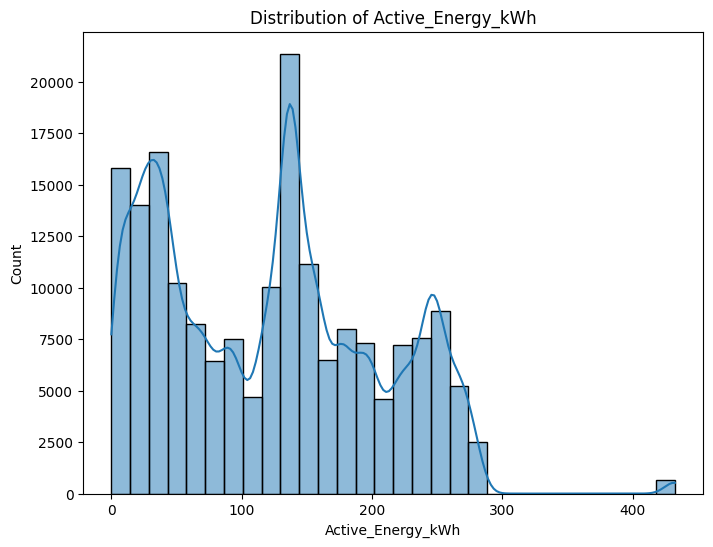

In [9]:
# Plotting histogram for distribution
plt.figure(figsize=(8, 6))
sns.histplot(df[target], kde=True, bins=30)
plt.title(f'Distribution of {target}')
plt.show()

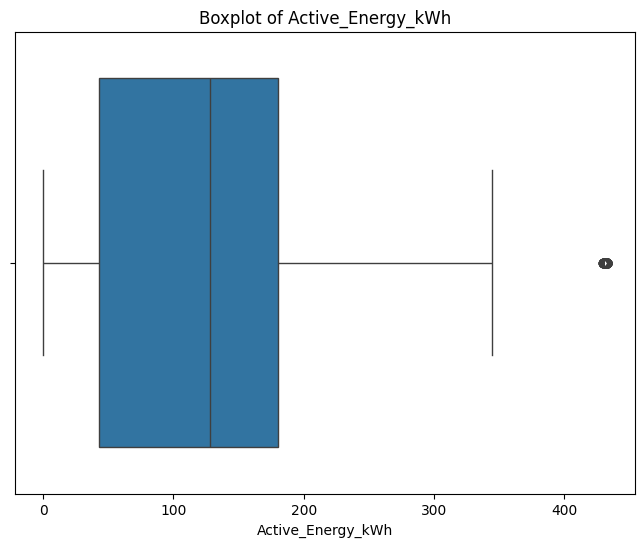

In [31]:
# Plotting boxplot to check for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[target])
plt.title(f'Boxplot of {target}')
plt.show()

In [32]:
# Calculate skewness
skewness = df[target].skew()
print(f'Skewness of {target}: {skewness}')

Skewness of Active_Energy_kWh: 0.3632398949189314


In [33]:
'''
pt = PowerTransformer(method='box-cox')
df[target] = pt.fit_transform(df[[target]])
'''

"\npt = PowerTransformer(method='box-cox')\ndf[target] = pt.fit_transform(df[[target]])\n"

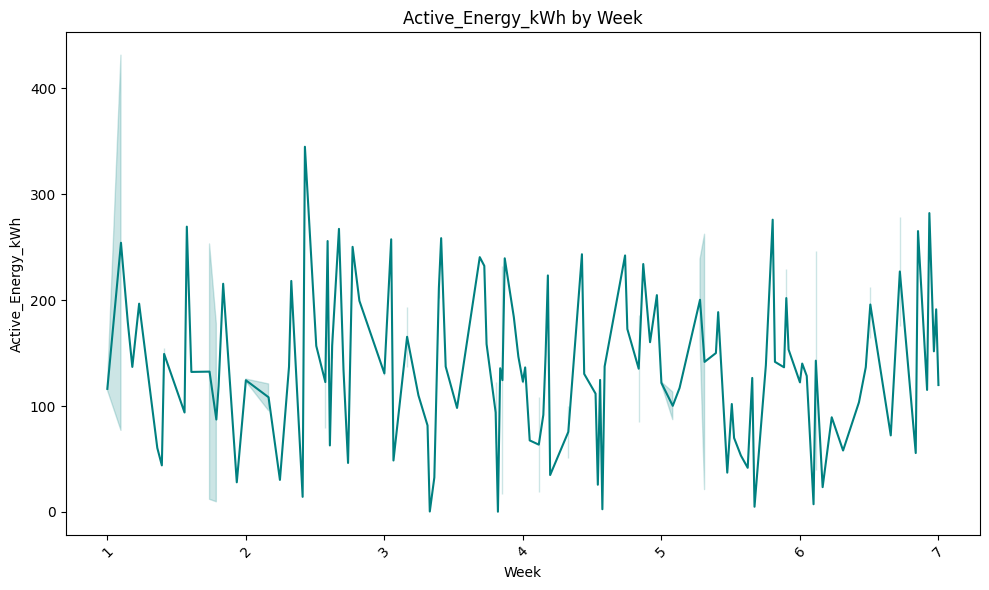

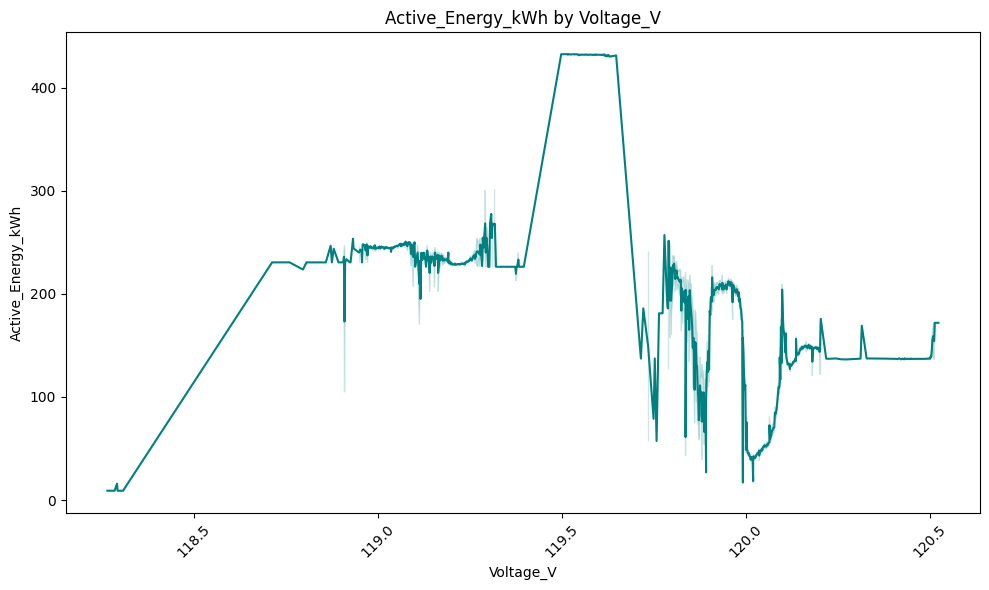

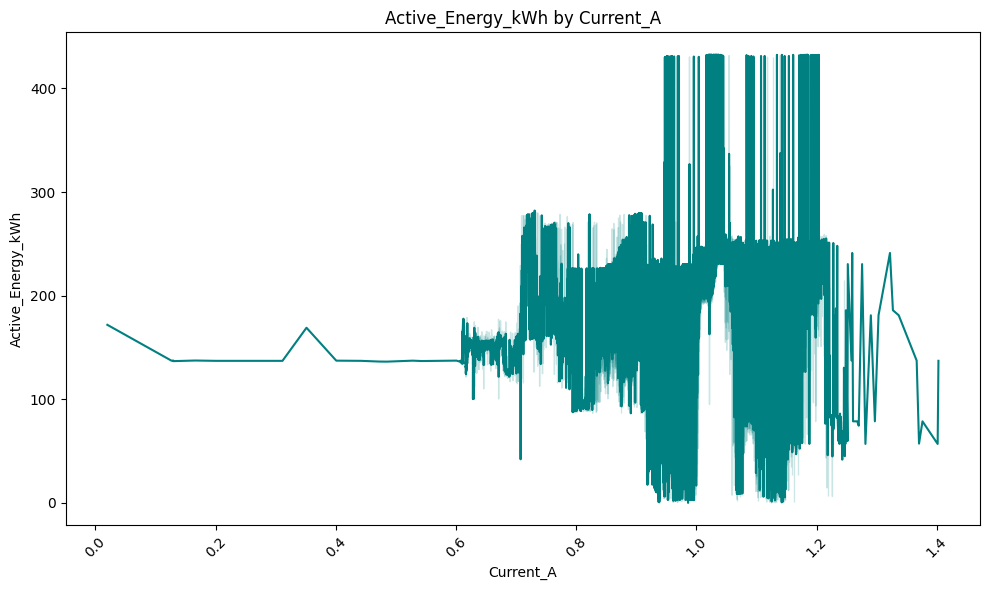

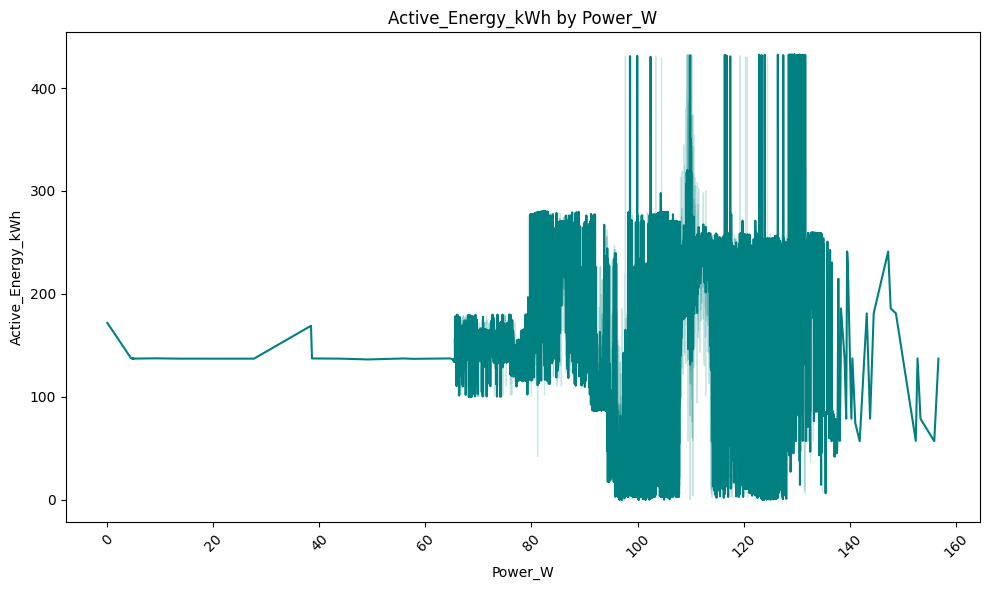

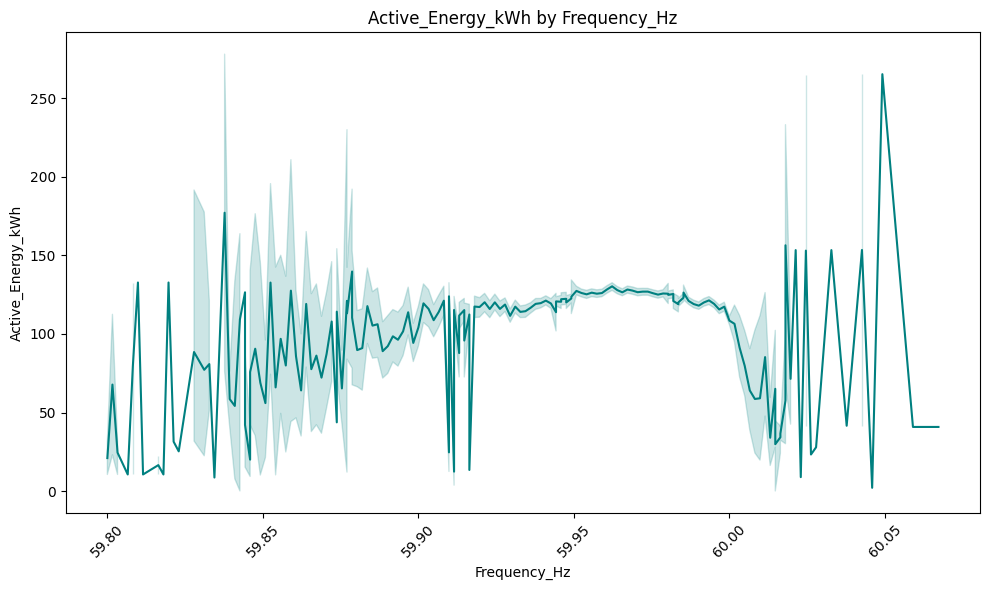

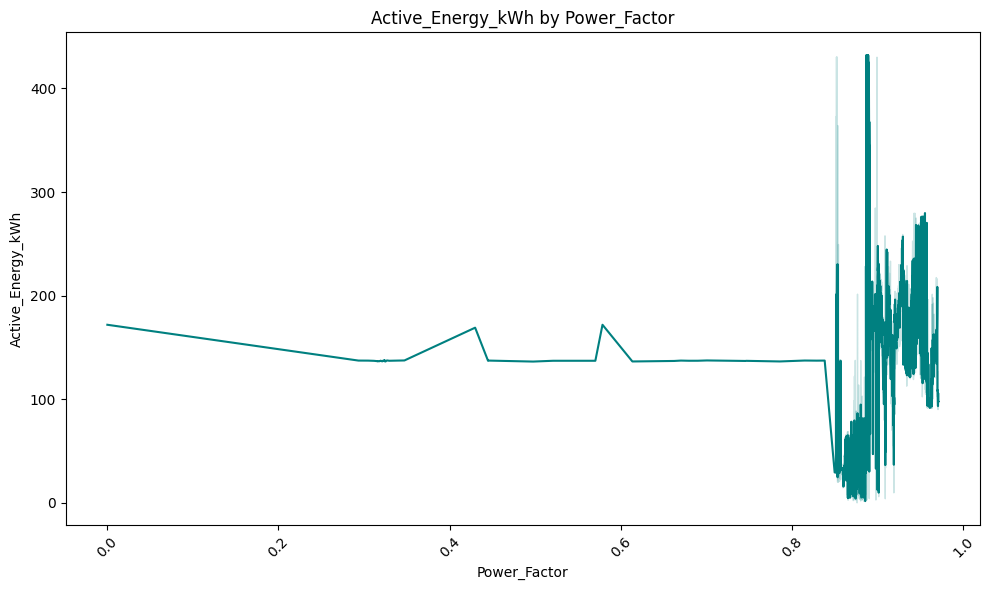

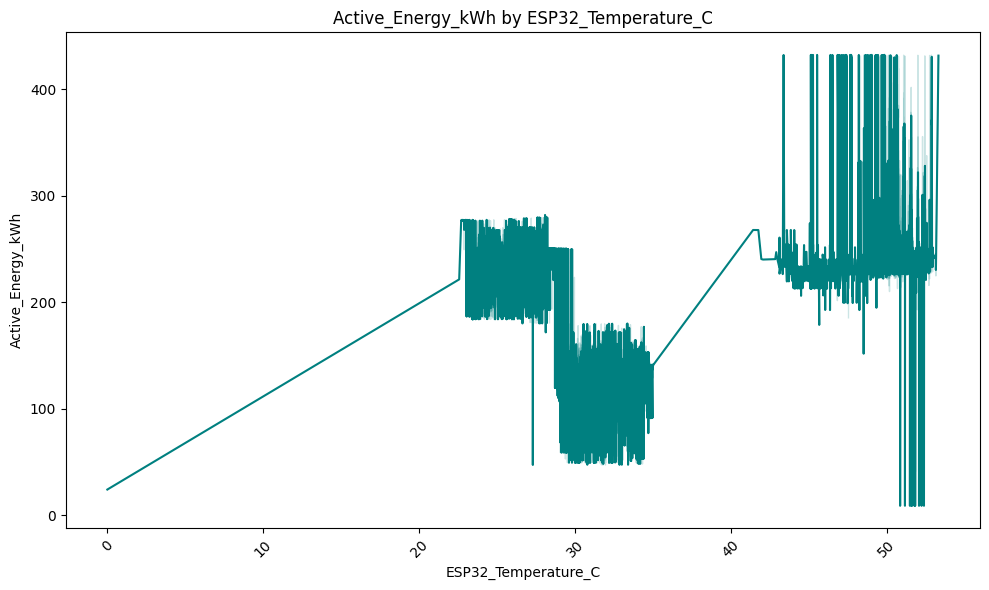

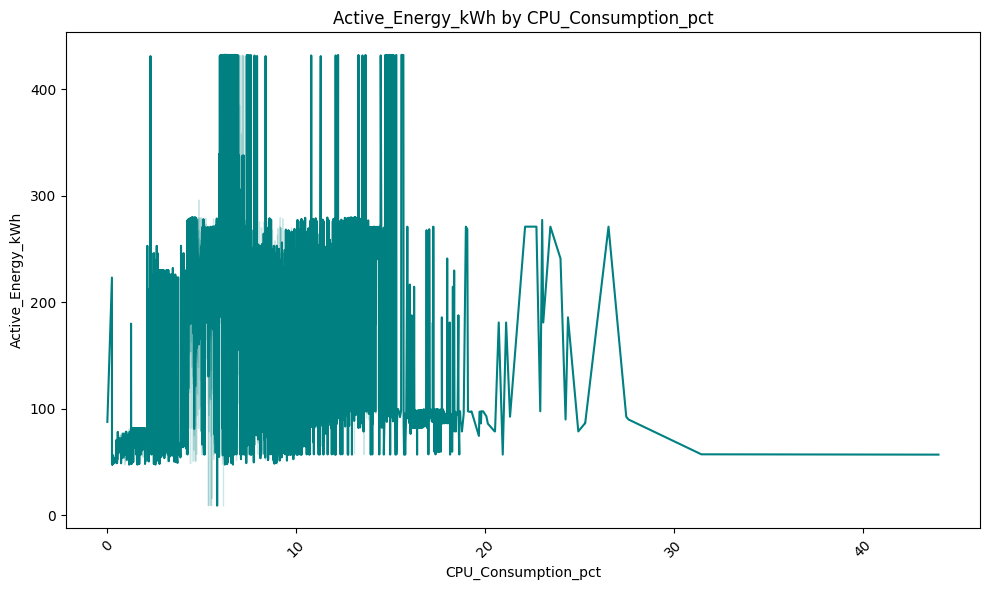

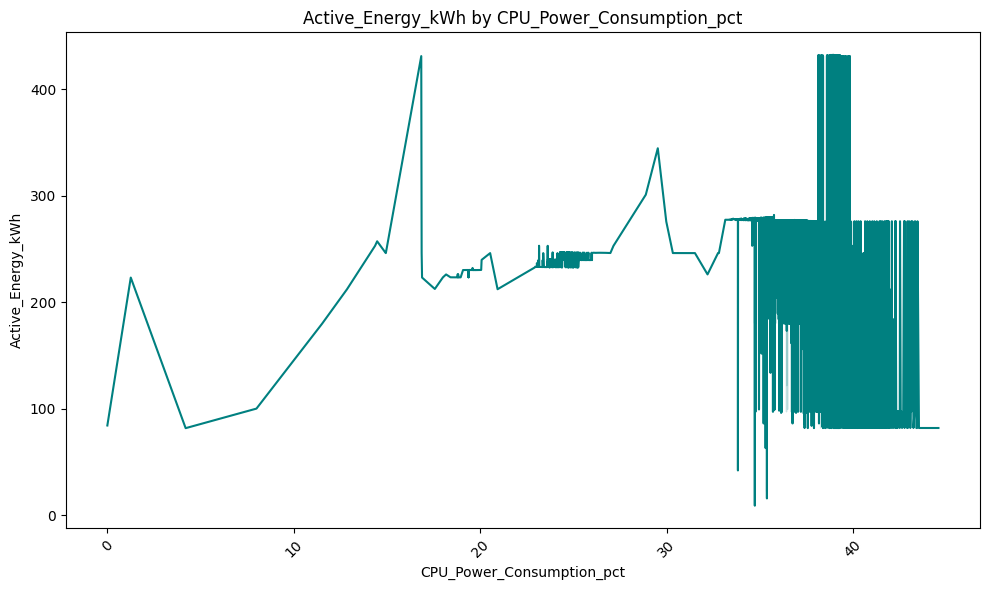

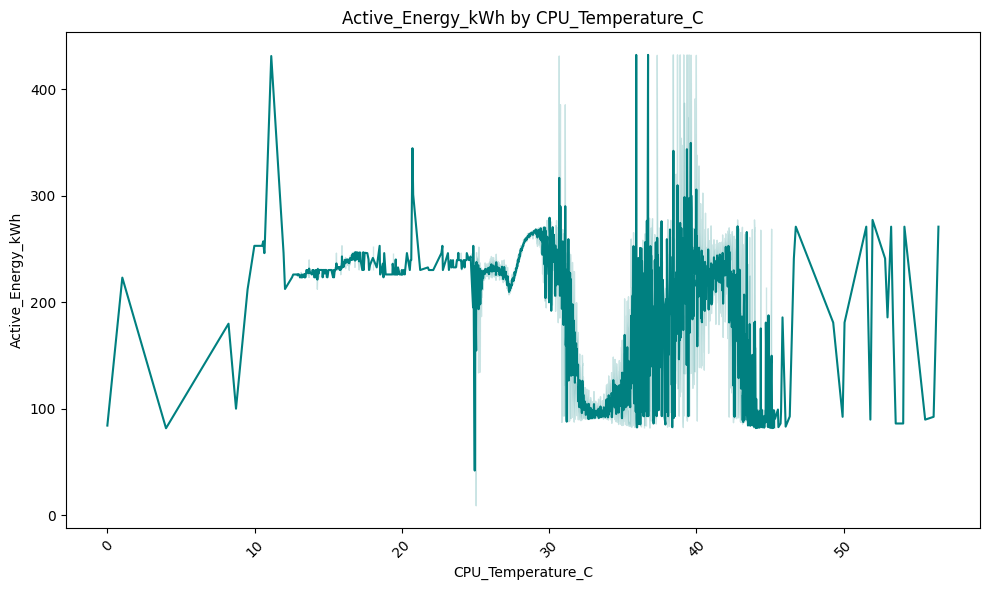

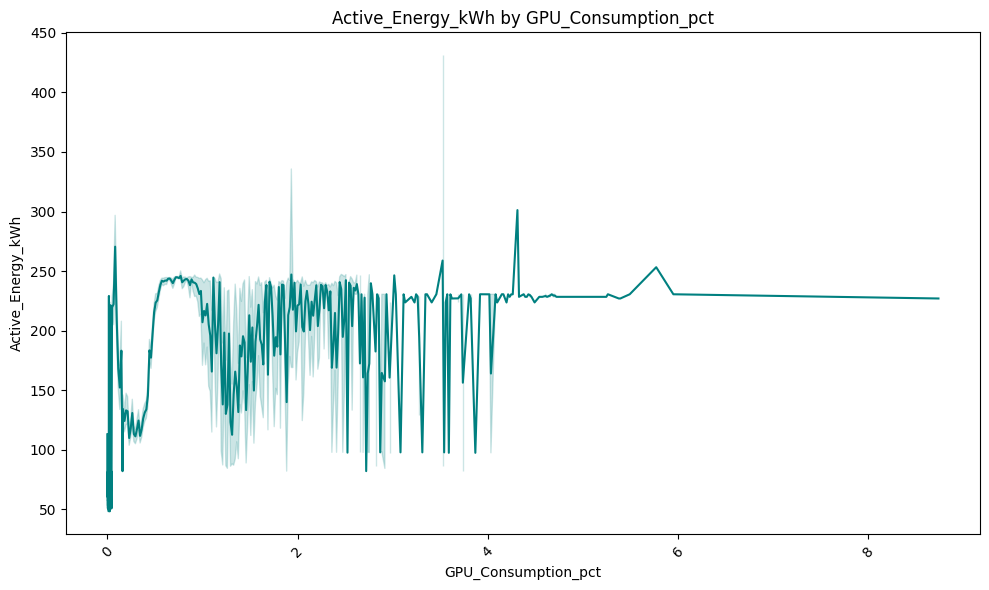

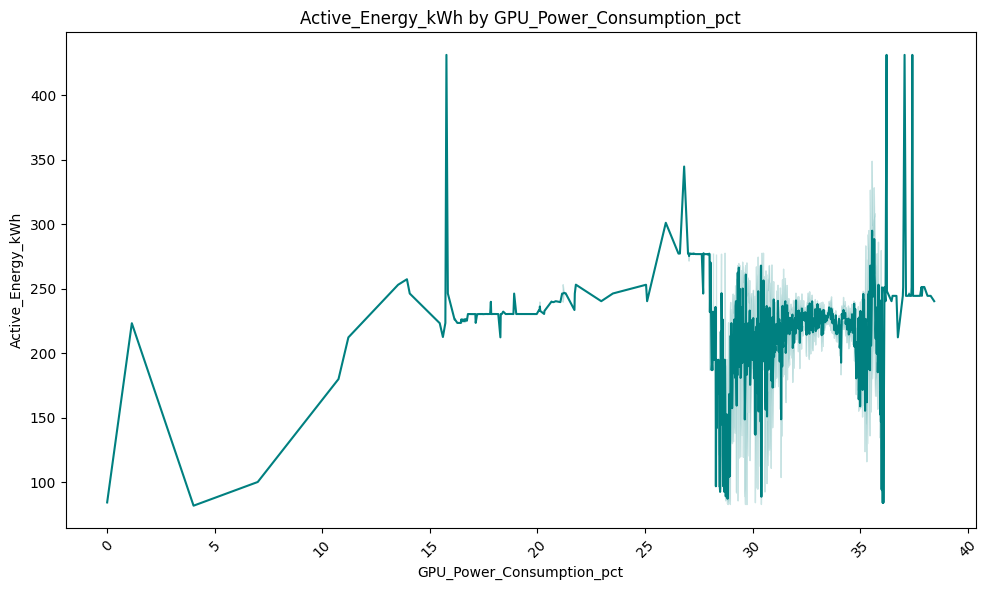

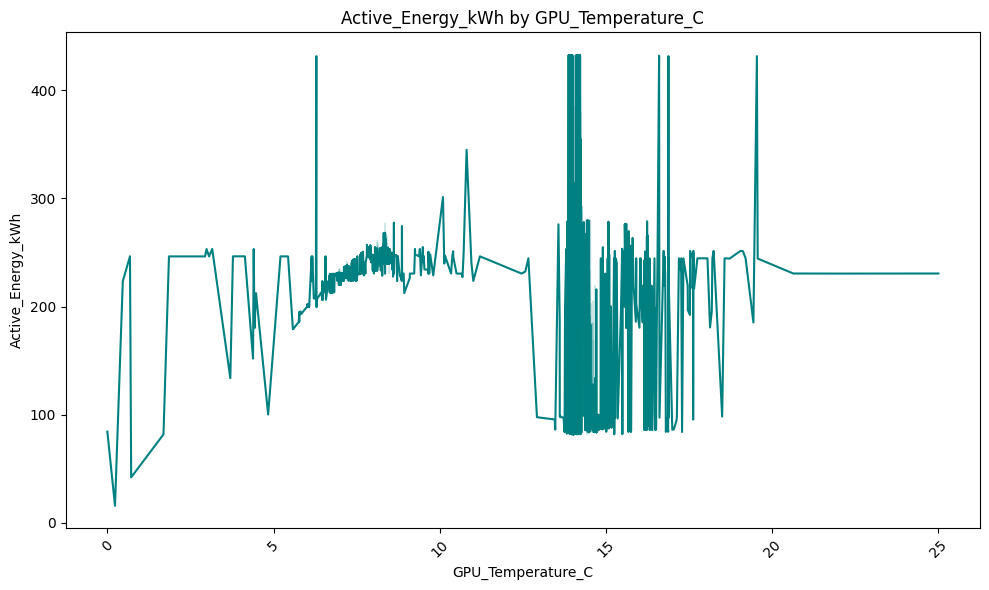

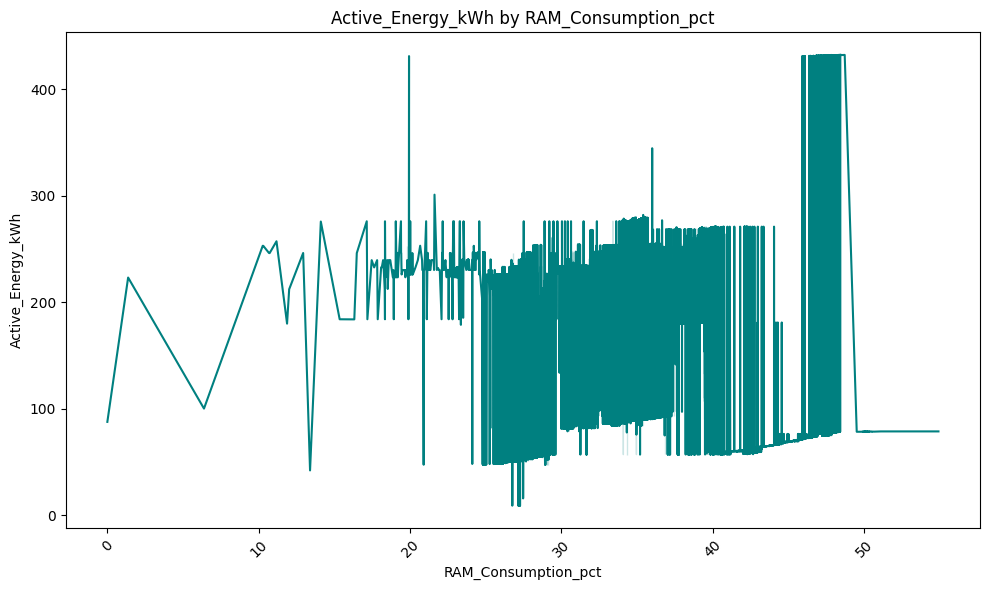

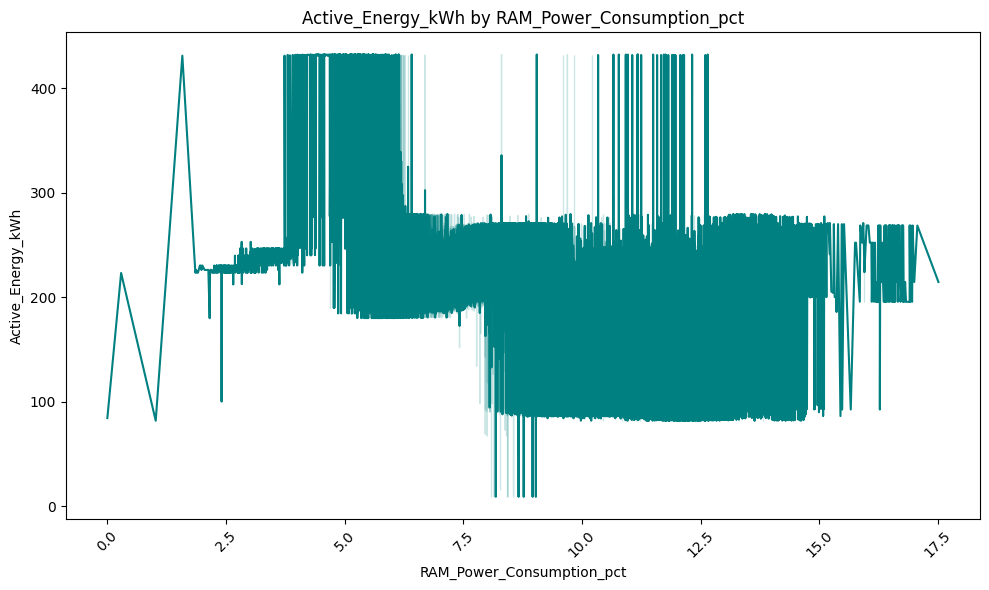

In [35]:
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=col, y=target, data=df, color='teal')
    plt.title(f'{target} by {col}')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

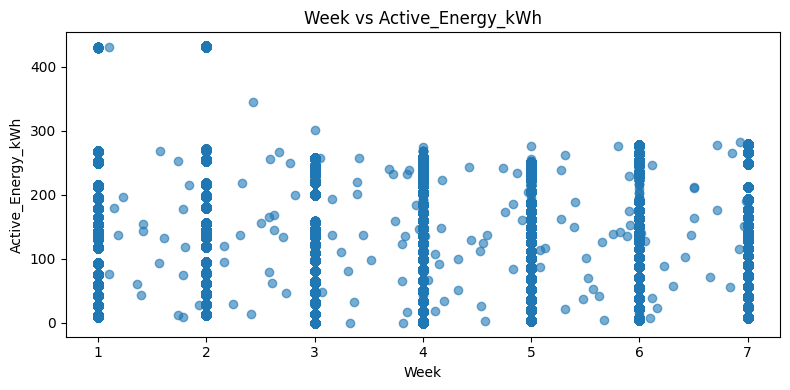

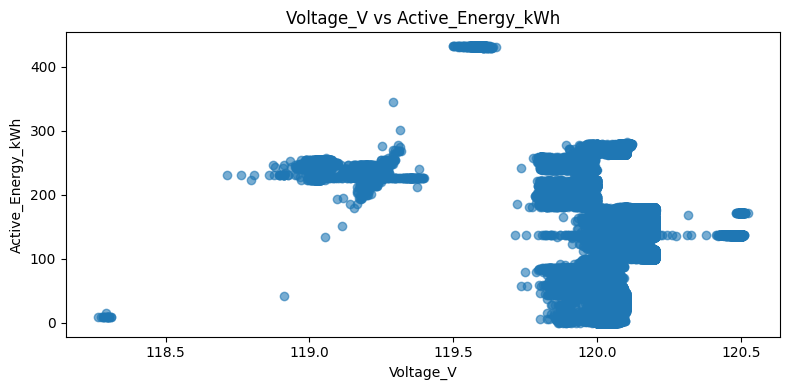

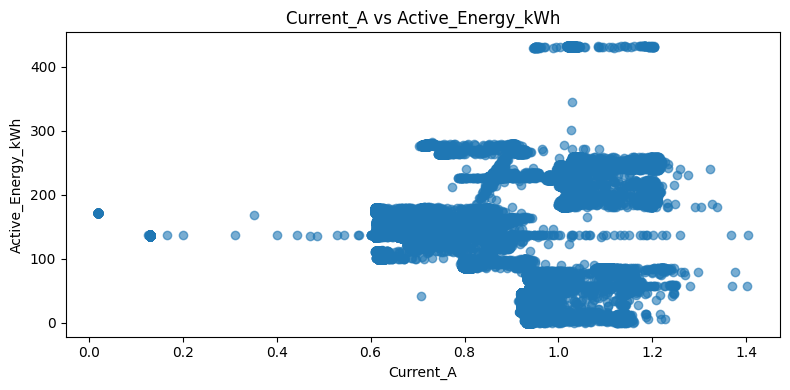

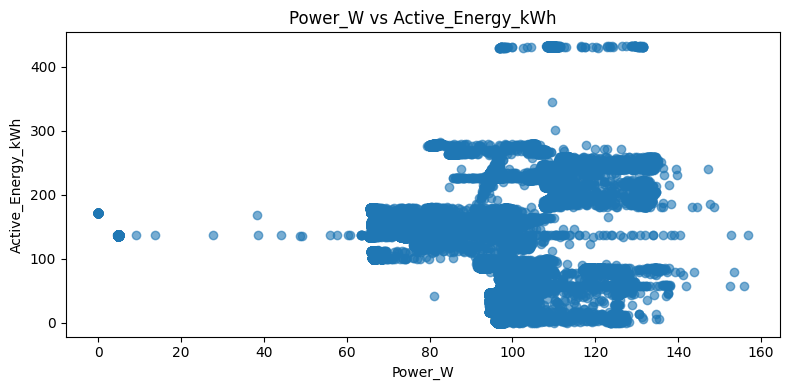

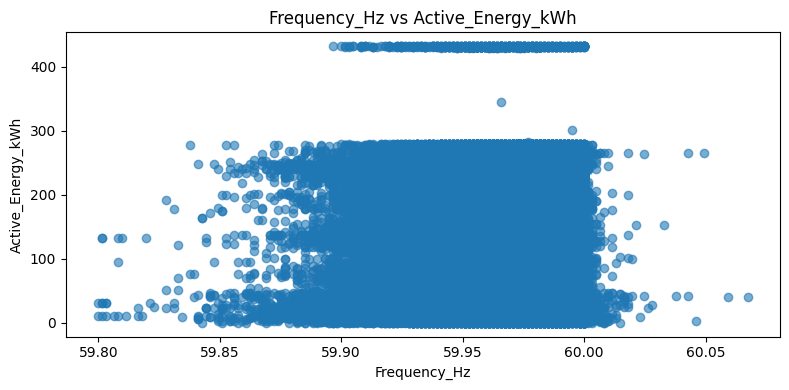

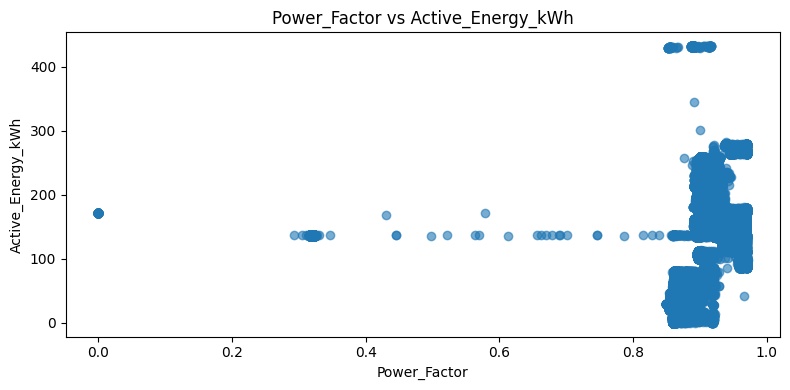

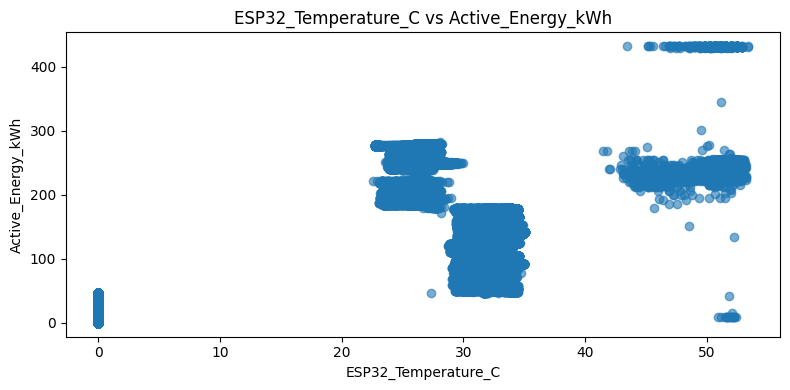

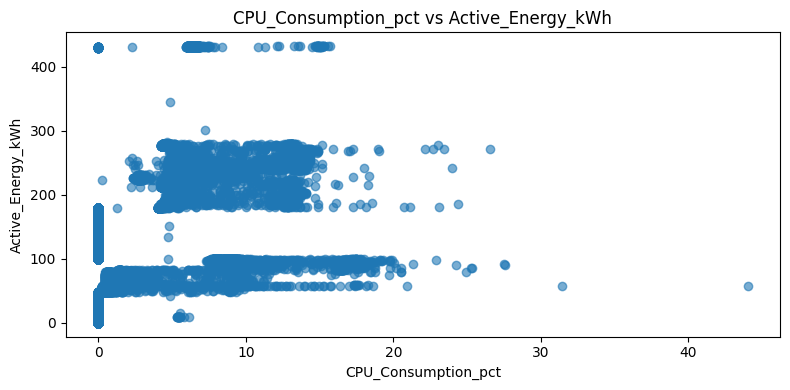

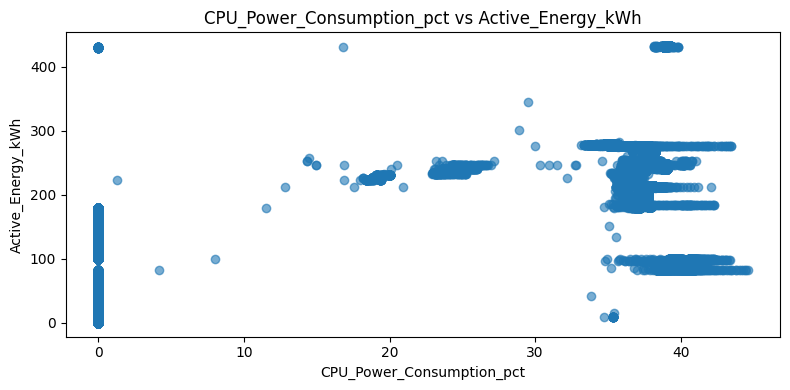

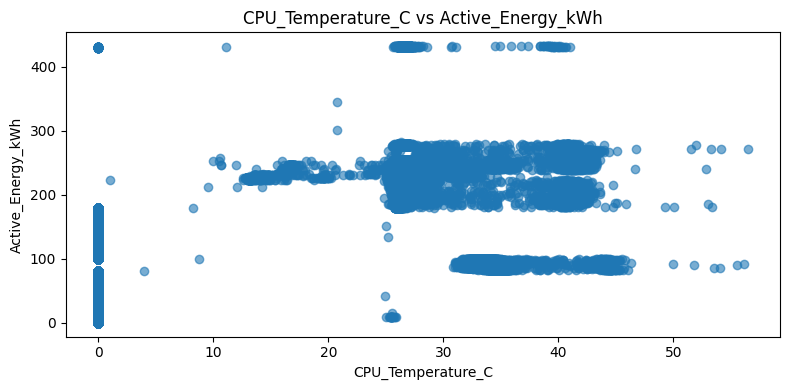

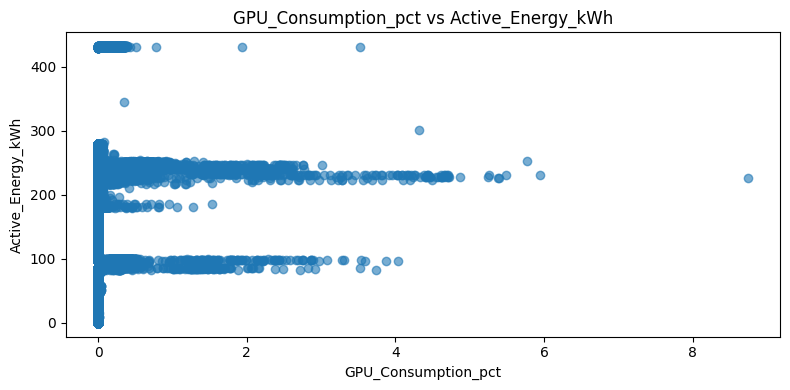

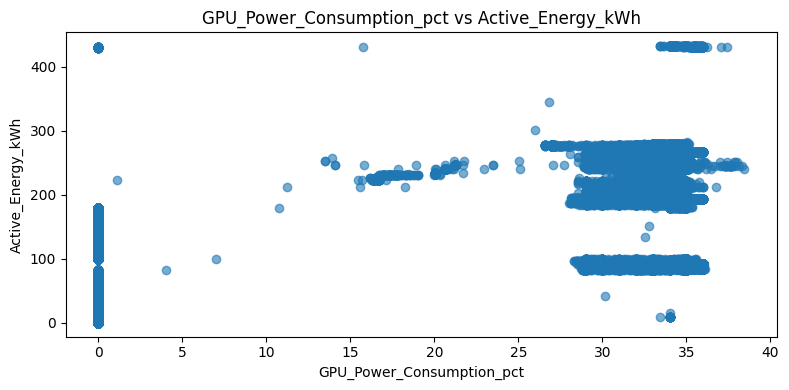

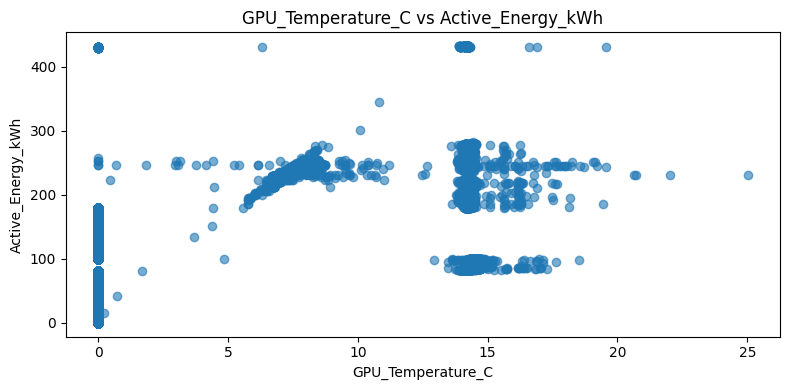

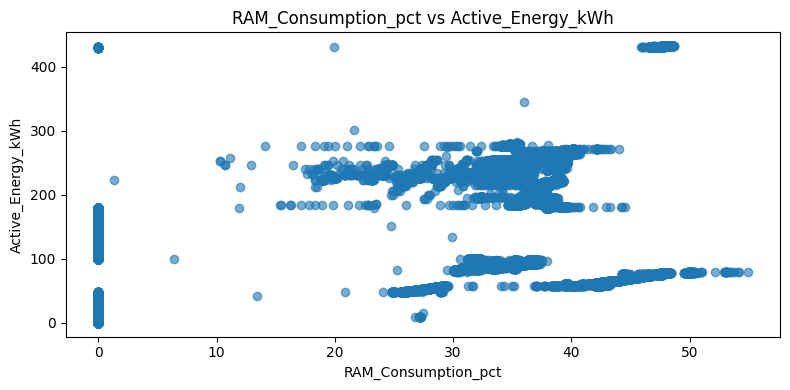

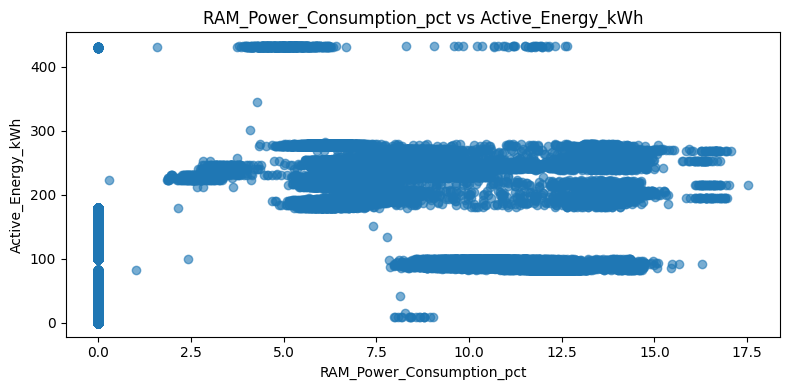

In [39]:
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.scatter(df[col], df[target], alpha=0.6)
    plt.title(f'{col} vs {target}')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()
    print('\n')

In [44]:
for col in numerical_columns:
  print(f'{col} Skewness ', df[col].skew())

Week Skewness  -0.11300525547704879
Voltage_V Skewness  -2.1427987258881003
Current_A Skewness  -1.5066226109155565
Power_W Skewness  -1.795115688359977
Frequency_Hz Skewness  -0.7306259084925844
Power_Factor Skewness  -3.4620977422290182
ESP32_Temperature_C Skewness  -0.5279210719852723
CPU_Consumption_pct Skewness  1.6235965686206
CPU_Power_Consumption_pct Skewness  0.8828851010390868
CPU_Temperature_C Skewness  0.9650709136668201
GPU_Consumption_pct Skewness  11.373024957823247
GPU_Power_Consumption_pct Skewness  0.8845686135719875
GPU_Temperature_C Skewness  1.021939958419903
RAM_Consumption_pct Skewness  0.5088061101483858
RAM_Power_Consumption_pct Skewness  1.1839500100954652


In [46]:
# Select only numeric columns (including target)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create a summary DataFrame with min & max
range_summary = df[num_cols].agg(['min', 'max']).T
range_summary.columns = ['Min', 'Max']
range_summary['Range'] = range_summary['Max'] - range_summary['Min']

print(range_summary)

                                  Min         Max       Range
Week                         1.000000    7.000000    6.000000
Voltage_V                  118.265574  120.522951    2.257377
Current_A                    0.020000    1.402623    1.382623
Power_W                      0.000000  156.755738  156.755738
Frequency_Hz                59.800000   60.067213    0.267213
Active_Energy_kWh            0.006230  432.503377  432.497148
Power_Factor                 0.000000    0.971311    0.971311
ESP32_Temperature_C          0.000000   53.333300   53.333300
CPU_Consumption_pct          0.000000   44.016393   44.016393
CPU_Power_Consumption_pct    0.000000   44.581148   44.581148
CPU_Temperature_C            0.000000   56.442623   56.442623
GPU_Consumption_pct          0.000000    8.737705    8.737705
GPU_Power_Consumption_pct    0.000000   38.442623   38.442623
GPU_Temperature_C            0.000000   25.008689   25.008689
RAM_Consumption_pct          0.000000   54.904918   54.904918
RAM_Powe

In [56]:
X_feature_importance = df.drop(target, axis = 1)
y_target_importance = df[target]

X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(
    X_feature_importance, y_target_importance, test_size=0.24, random_state=42
)

rfc_model = RandomForestRegressor()
rfc_model.fit(X_full_train, y_full_train)

feature_importances = pd.DataFrame({
    'Feature': X_full_train.columns,
    'Importance': rfc_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

 # Display top features
top_features = feature_importances['Feature'].tolist()
print(len(top_features))
print("Top Features Selected:", top_features)

15
Top Features Selected: ['Power_Factor', 'CPU_Power_Consumption_pct', 'GPU_Temperature_C', 'Current_A', 'RAM_Consumption_pct', 'ESP32_Temperature_C', 'Power_W', 'CPU_Consumption_pct', 'Voltage_V', 'CPU_Temperature_C', 'Week', 'Frequency_Hz', 'RAM_Power_Consumption_pct', 'GPU_Consumption_pct', 'GPU_Power_Consumption_pct']


In [10]:
X = df.drop(target, axis = 1)
y = df[target]

In [17]:
# Bin into 5 categories (quantile-based bins) - For stratified we must bin or discretize sampling continuous y [target] variable
y_binned = pd.qcut(y, q=5, labels=False)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y_binned)

In [19]:
#Initialize scaler
min_max_scaler = MinMaxScaler()

X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

### ✅ 🧠 3. Baseline Models
- Evaluated simple models before moving to deep learning.

In [70]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Predictions
    y_train_pred = model.predict(X_train).flatten()
    y_test_pred = model.predict(X_test).flatten()

    # Train metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = np.mean(np.abs((y_train - y_train_pred) / (y_train + 1e-8))) * 100
    train_acc = 100 - train_mape

    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = np.mean(np.abs((y_test - y_test_pred) / (y_test + 1e-8))) * 100
    test_acc = 100 - test_mape

    print("\n📊 Train vs Test Results:")
    print({
        "train_r2": train_r2,
        "train_mae": train_mae,
        "train_accuracy(1-MAPE)": train_acc,
        "test_r2": test_r2,
        "test_mae": test_mae,
        "test_accuracy(1-MAPE)": test_acc
    })

In [82]:
def plot_actual_vs_predicted(model, X_test, y_test):
    """
    Plots actual vs predicted values for ALL test samples.
    """
    # Predictions
    y_pred = model.predict(X_test, verbose=0).flatten()

    # Scatter plot with different colors
    plt.figure(figsize=(6, 6))
    
    # Actual values
    plt.scatter(range(len(y_test)), y_test, alpha=0.6, color="blue", label="Actual")
    
    # Predicted values
    plt.scatter(range(len(y_pred)), y_pred, alpha=0.6, color="red", label="Predicted")
    
    plt.title("Actual vs Predicted (Scatter, All Samples)")
    plt.xlabel("Sample Index")
    plt.ylabel("Target Value")
    plt.legend()
    plt.grid(True)
    plt.show()

In [28]:
def plot_training_history(history):
    """
    Plots training & validation loss and MAE curves.
    """
    # Loss (MSE)
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss (MSE)')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

    # MAE
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Model MAE')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.show()

In [51]:
def save_trained_model(model, save_dir, model_name):
    os.makedirs(save_dir, exist_ok=True)

    # Save in new .keras format (recommended)
    model.save(os.path.join(save_dir, f"{model_name}.keras"))

    # (Optional) Save in HDF5 format
    #model.save(os.path.join(save_dir, f"{model_name}.h5"))

    # (Optional) Save as TensorFlow SavedModel
    #model.export(os.path.join(save_dir, f"{model_name}_saved"))

    print(f"✅ Model saved in all formats under: {save_dir}")

In [100]:
def load_trained_model(save_dir, model_name, fmt):
    if fmt == "keras":
        model = tf.keras.models.load_model(os.path.join(save_dir, f"{model_name}.keras"))
        print("✅ Loaded from .keras format")
    elif fmt == "h5":
        model = tf.keras.models.load_model(os.path.join(save_dir, f"{model_name}.h5"))
        print("✅ Loaded from .h5 format")
    elif fmt == "saved":
        model = tf.keras.models.load_model(os.path.join(save_dir, f"{model_name}_saved"))
        print("✅ Loaded from SavedModel format")
    else:
        raise ValueError("Format must be one of: 'keras', 'h5', 'saved'")

    model.summary()
    return model

In [47]:
def build_and_train_baseline_nn(X_train, y_train, X_test, y_test, 
                             epochs=20, batch_size=32, val_size=0.15):
    """
    Baseline regression NN:
    - Splits train into train/val
    - Trains model
    - Evaluates on test set
    - Reports MSE, MAE, RMSE, R², and Accuracy (1-MAPE)
    """

    # Split train into train/validation
    X_train_sub, X_val, y_train_sub, y_val = train_test_split(
        X_train, y_train, test_size=val_size, random_state=42
    )

    # Define NN model
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # regression output
    ])

    # Compile
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae', tf.keras.metrics.RootMeanSquaredError(name="rmse")]
    )

    # Train
    history = model.fit(
        X_train_sub, y_train_sub,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Evaluate on test set
    print("\n📊 Final Evaluation on Test Set:")
    test_results = model.evaluate(X_test, y_test, verbose=0)
    eval_dict = dict(zip(model.metrics_names, test_results))

    # Extra metrics
    y_pred = model.predict(X_test).flatten()
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    accuracy = 100 - mape

    eval_dict["r2"] = r2
    eval_dict["accuracy(1-MAPE)"] = accuracy

    print(eval_dict)

    return history, model, eval_dict

In [48]:
baseline_nn_history, baseline_nn_model, baseline_nn_eval_dict = build_and_train_baseline_nn(X_train_scaled, y_train, X_test_scaled, y_test, epochs=20)

Epoch 1/20
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - loss: 5398.9634 - mae: 49.7533 - rmse: 69.8897 - val_loss: 1514.1748 - val_mae: 24.6873 - val_rmse: 38.9124
Epoch 2/20
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - loss: 1478.5966 - mae: 24.7465 - rmse: 38.4479 - val_loss: 1332.1818 - val_mae: 24.0463 - val_rmse: 36.4991
Epoch 3/20
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - loss: 1361.2743 - mae: 24.4078 - rmse: 36.8941 - val_loss: 1317.2808 - val_mae: 24.1900 - val_rmse: 36.2944
Epoch 4/20
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - loss: 1349.4736 - mae: 24.3209 - rmse: 36.7346 - val_loss: 1321.1465 - val_mae: 24.1718 - val_rmse: 36.3476
Epoch 5/20
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - loss: 1335.8204 - mae: 24.1256 - rmse: 36.5475 - val_loss: 1312.8527 - val_mae: 24.0228 - val_rmse: 36.2333
Epoch 6/20
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - loss: 1345.2318 - mae: 24.1550 - rmse: 36.6770 - val_loss: 1371.5177 - val_mae: 25.6482 - val_rmse: 37.0340
Epoch 7/20

In [103]:
# Save
save_trained_model(baseline_nn_model, save_dir="Saved Models", model_name="baseline_simple_nn")

# Later... load
baseline_nn_model = load_trained_model(save_dir="Saved Models", model_name="baseline_simple_nn", fmt="keras")

✅ Model saved in all formats under: Saved Models
✅ Loaded from .keras format


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,413 (36.77 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,276 (24.52 KB)

In [104]:
evaluate_model(baseline_nn_model, X_train_scaled, y_train, X_test_scaled, y_test)

4323/4323 ━━━━━━━━━━━━━━━━━━━━ 4s 906us/step
1441/1441 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step

📊 Train vs Test Results:
{'train_r2': 0.786332758017299, 'train_mae': 28.3274398988952, 'train_accuracy(1-MAPE)': -122.77718994430265, 'test_r2': 0.7897518312977087, 'test_mae': 28.10529957785117, 'test_accuracy(1-MAPE)': -121.35707723769875}


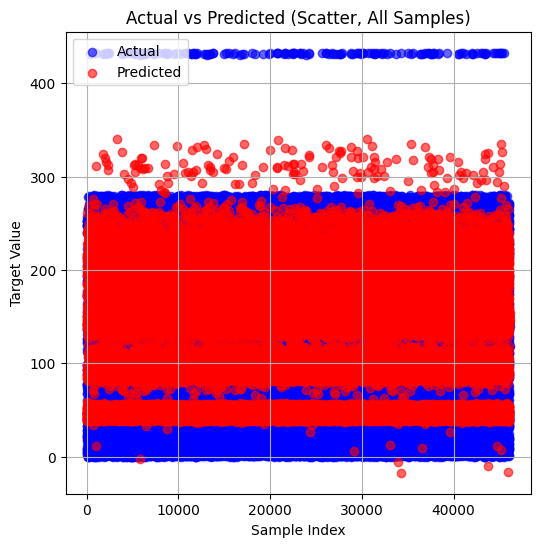

In [105]:
plot_actual_vs_predicted(baseline_nn_model, X_test_scaled, y_test)

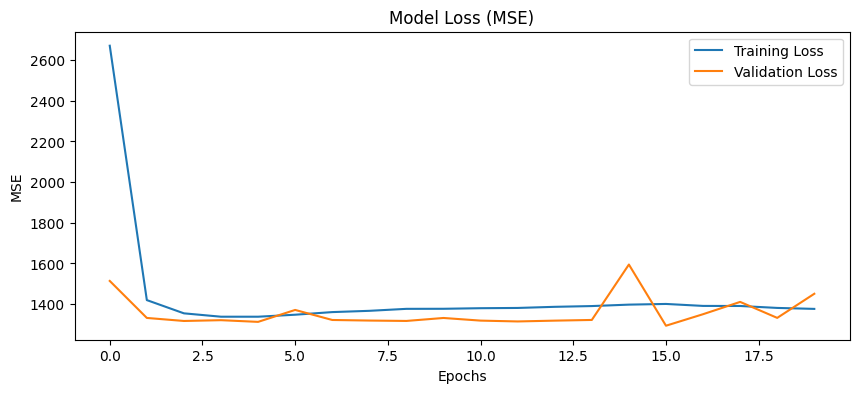

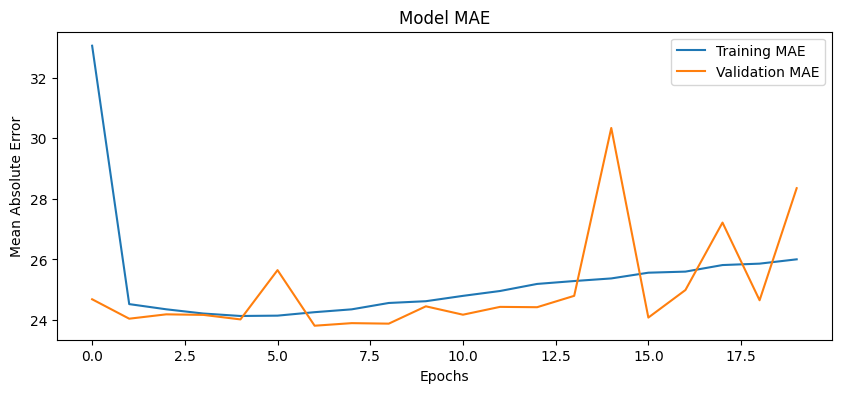

In [50]:
plot_training_history(baseline_nn_history)

### ✅ 🔮 4. Neural Network Modeling
- Built a **feedforward deep neural network** for regression.
- Input: structured numerical + temporal features.
- Output: continuous prediction of energy consumption.

In [89]:
def build_and_train_baseline_complex_nn(X_train, y_train, X_test, y_test, 
                                epochs=30, batch_size=64, val_size=0.15):
    """
    Improved Baseline Regression NN:
    - Slightly deeper network
    - Regularization (Dropout + L2) to reduce overfitting
    - EarlyStopping to avoid wasting epochs
    - Reports MSE, MAE, RMSE, R², and Accuracy (1-MAPE)
    """

    # Split train into train/validation
    X_train_sub, X_val, y_train_sub, y_val = train_test_split(
        X_train, y_train, test_size=val_size, random_state=42
    )

    # Define NN model
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
        layers.Dropout(0.3),   # prevent overfitting
        layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # regression output
    ])

    # Compile
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae', tf.keras.metrics.RootMeanSquaredError(name="rmse")]
    )

    # Callbacks (EarlyStopping)
    early_stop = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=10, restore_best_weights=True
    )

    # Train
    history = model.fit(
        X_train_sub, y_train_sub,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stop],
        verbose=1
    )

    # Evaluate on test set
    print("\n📊 Final Evaluation on Test Set:")
    test_results = model.evaluate(X_test, y_test, verbose=0)
    eval_dict = dict(zip(model.metrics_names, test_results))

    # Extra metrics
    y_pred = model.predict(X_test).flatten()
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-8))) * 100
    accuracy = 100 - mape

    eval_dict["r2"] = r2
    eval_dict["accuracy(1-MAPE)"] = accuracy

    print(eval_dict)

    return history, model, eval_dict


In [90]:
baseline_complex_nn_history, baseline_complex_nn_model, baseline_complex_nn_results = build_and_train_baseline_complex_nn(X_train_scaled, y_train, X_test_scaled, y_test)

Epoch 1/30
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 4772.7500 - mae: 47.5711 - rmse: 66.1004 - val_loss: 1578.1217 - val_mae: 25.8759 - val_rmse: 39.7245
Epoch 2/30
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 4060.2429 - mae: 47.5685 - rmse: 63.2149 - val_loss: 10370.5859 - val_mae: 75.0895 - val_rmse: 101.8305
Epoch 3/30
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 7121.1650 - mae: 65.1674 - rmse: 84.2672 - val_loss: 10675.3711 - val_mae: 84.0136 - val_rmse: 103.3120
Epoch 4/30
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 9435.1084 - mae: 73.8727 - rmse: 97.0653 - val_loss: 16267.4297 - val_mae: 94.4410 - val_rmse: 127.5329
Epoch 5/30
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 16212.0996 - mae: 84.2187 - rmse: 124.2841 - val_loss: 281603.7188 - val_mae: 370.8077 - val_rmse: 530.6605
Epoch 6/30
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 19429.9375 - mae: 93.7486 - rmse: 135.8471 - val_loss: 46063.2578 - val_mae: 159.1566 - val_rm

In [97]:
evaluate_model(baseline_complex_nn_model, X_train_scaled, y_train, X_test_scaled, y_test)

4323/4323 ━━━━━━━━━━━━━━━━━━━━ 4s 969us/step
1441/1441 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step

📊 Train vs Test Results:
{'train_r2': 0.7679961094696921, 'train_mae': 25.947597662210036, 'train_accuracy(1-MAPE)': -70.67521978393964, 'test_r2': 0.7711052763741537, 'test_mae': 25.760683123935692, 'test_accuracy(1-MAPE)': -69.6082255363768}


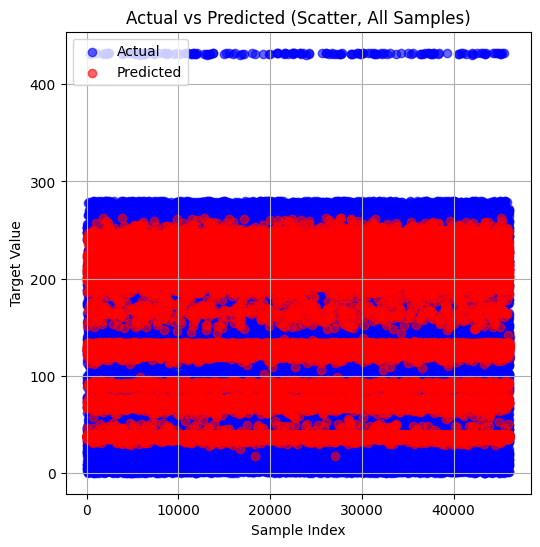

In [98]:
plot_actual_vs_predicted(baseline_complex_nn_model, X_test_scaled, y_test)

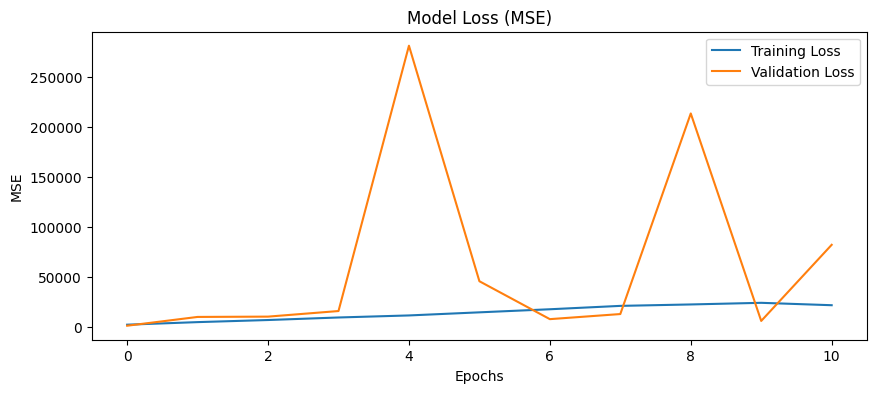

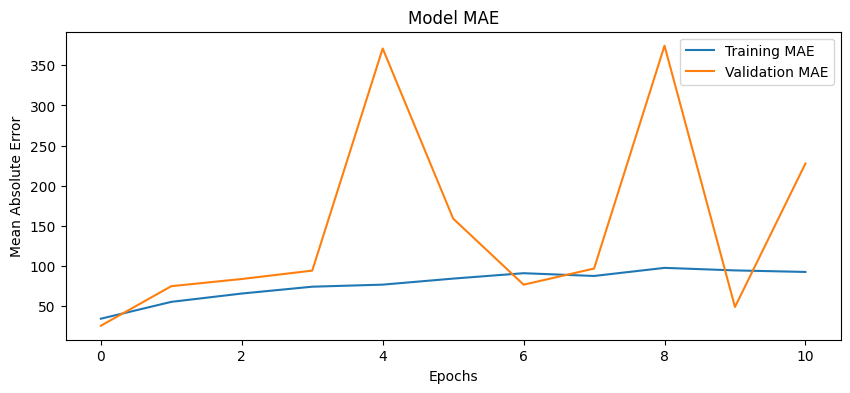

In [99]:
plot_training_history(baseline_complex_nn_history)

### ✅ ⚙️ 5. Hyperparameter Tuning and Model Evaluation
- Experimented with:
  - Number of hidden layers
  - Neurons per layer
  - Activation functions
  - Optimizers & learning rates
  - Regularization (Dropout, L2)
- Compared validation loss & performance.
- Metrics: **MAE, RMSE, R² Score**.
- Compared deep learning model with baseline models.
- Visualized **actual vs predicted energy consumption**.

In [42]:
def build_and_train_complex_nn(X_train, y_train, X_test, y_test, 
                               epochs=20, batch_size=32, val_size=0.15,
                               learning_rate=0.001, dropout_rate=0.3, l2_lambda=0.001, patience=10):
    """
    Complex regression NN with regularization & early stopping.
    Reports MSE, MAE, RMSE, R², and Accuracy (1-MAPE).
    """

    # Split train into train/validation
    X_train_sub, X_val, y_train_sub, y_val = train_test_split(
        X_train, y_train, test_size=val_size, random_state=42
    )

    # Define NN model
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),

        layers.Dense(128, activation='relu',
                     kernel_regularizer=keras.regularizers.l2(l2_lambda)),
        layers.Dropout(dropout_rate),

        layers.Dense(64, activation='relu',
                     kernel_regularizer=keras.regularizers.l2(l2_lambda)),
        layers.Dropout(dropout_rate),

        layers.Dense(32, activation='relu',
                     kernel_regularizer=keras.regularizers.l2(l2_lambda)),

        layers.Dense(1)  # regression output
    ])

    # Compile
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae', tf.keras.metrics.RootMeanSquaredError(name="rmse")]
    )

    # Early stopping
    early_stop = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        restore_best_weights=True
    )

    # Train
    history = model.fit(
        X_train_sub, y_train_sub,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1,
        callbacks=[early_stop]
    )

    # Evaluate on test set
    print("\n📊 Final Evaluation on Test Set:")
    test_results = model.evaluate(X_test, y_test, verbose=0)
    eval_dict = dict(zip(model.metrics_names, test_results))

    # Extra metrics
    y_pred = model.predict(X_test).flatten()
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    accuracy = 100 - mape

    eval_dict["r2"] = r2
    eval_dict["accuracy(1-MAPE)"] = accuracy

    print(eval_dict)

    return history, model, eval_dict

In [43]:
complex_nn_history, complex_nn_model, complex_nn_results = build_and_train_complex_nn(
    X_train_scaled, y_train, X_test_scaled, y_test,
    epochs=25,
    learning_rate=0.001,
    dropout_rate=0.3,
    l2_lambda=0.001,
    patience=10
)

Epoch 1/25
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - loss: 4055.9055 - mae: 43.4924 - rmse: 61.2207 - val_loss: 3957.5808 - val_mae: 42.3797 - val_rmse: 62.8314
Epoch 2/25
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - loss: 7355.7822 - mae: 65.5196 - rmse: 85.5199 - val_loss: 3540.9399 - val_mae: 42.0431 - val_rmse: 59.2354
Epoch 3/25
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - loss: 16709.6191 - mae: 93.9738 - rmse: 128.6181 - val_loss: 50198.8203 - val_mae: 188.2139 - val_rmse: 223.9451
Epoch 4/25
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 36s 10ms/step - loss: 24573.3008 - mae: 111.3156 - rmse: 156.0934 - val_loss: 116032.7266 - val_mae: 278.6719 - val_rmse: 340.5460
Epoch 5/25
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 36s 10ms/step - loss: 35456.5391 - mae: 131.0775 - rmse: 187.6846 - val_loss: 104131.3047 - val_mae: 205.5404 - val_rmse: 322.5816
Epoch 6/25
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 36s 10ms/step - loss: 52059.8359 - mae: 155.9043 - rmse: 226.6731 - val_loss: 4872.6426 - val_mae: 48.0634 - 

In [106]:
evaluate_model(complex_nn_model, X_train_scaled, y_train, X_test_scaled, y_test)

4323/4323 ━━━━━━━━━━━━━━━━━━━━ 4s 941us/step
1441/1441 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step

📊 Train vs Test Results:
{'train_r2': 0.4806819741214755, 'train_mae': 42.549053786970426, 'train_accuracy(1-MAPE)': -31.972591919720344, 'test_r2': 0.4846970115933842, 'test_mae': 42.400686773701395, 'test_accuracy(1-MAPE)': -31.33515513325972}


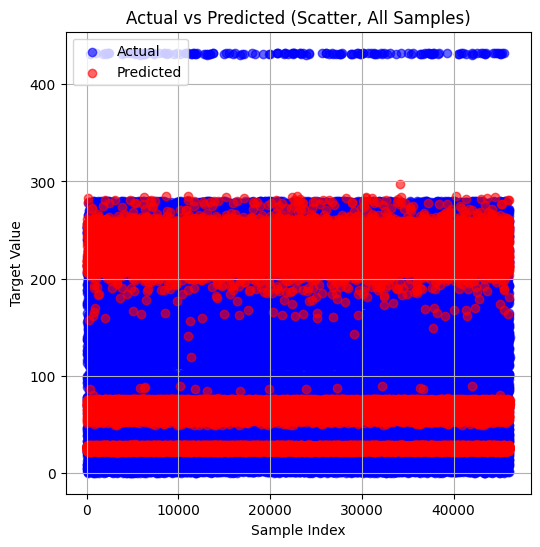

In [107]:
plot_actual_vs_predicted(complex_nn_model, X_test_scaled, y_test)

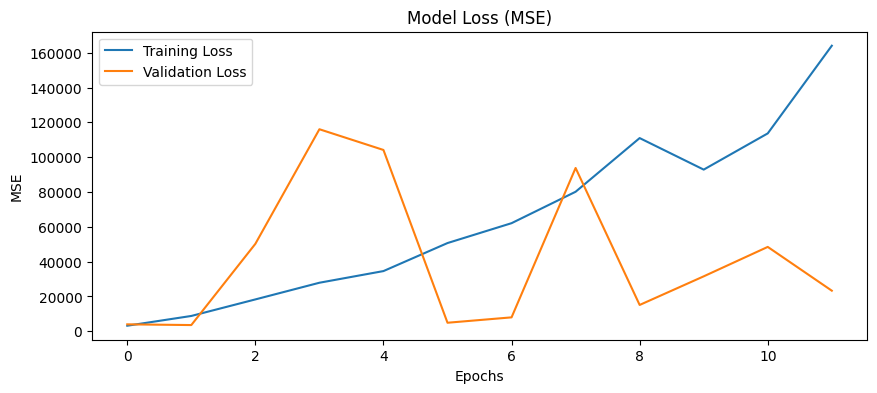

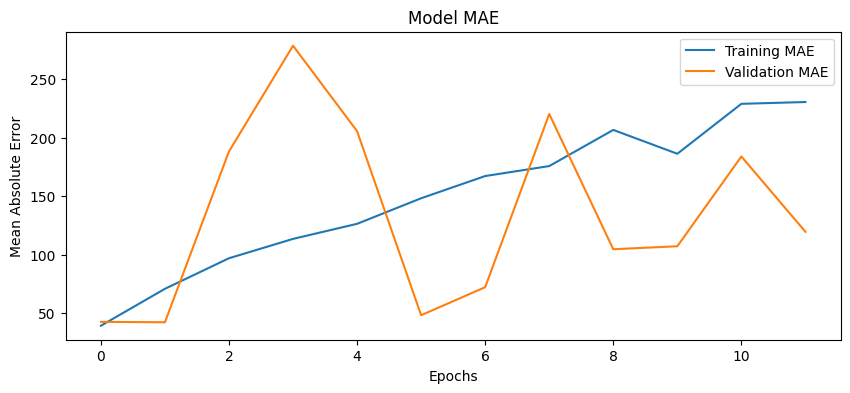

In [44]:
plot_training_history(complex_nn_history)

In [73]:
def build_and_train_autoencoder(X_train, X_test,
                                encoding_dim=32,
                                epochs=20,
                                batch_size=32,
                                val_size=0.15):
    """
    Step 1: Train Autoencoder on input features (unsupervised pretraining).
    Returns trained autoencoder, encoder, history, and evaluation metrics.
    """
    input_dim = X_train.shape[1]

    # Split train into train/val for autoencoder
    X_train_sub, X_val = train_test_split(X_train, test_size=val_size, random_state=42)

    # Define Autoencoder
    input_layer = keras.Input(shape=(input_dim,))
    encoded = layers.Dense(encoding_dim, activation="relu")(input_layer)
    decoded = layers.Dense(input_dim, activation="linear")(encoded)

    autoencoder = keras.Model(inputs=input_layer, outputs=decoded)
    encoder = keras.Model(inputs=input_layer, outputs=encoded)

    # Compile AE
    autoencoder.compile(optimizer="adam", loss="mse", metrics=["mae"])

    # Train AE
    print("\n🔹 Training Autoencoder...")
    history = autoencoder.fit(
        X_train_sub, X_train_sub,
        validation_data=(X_val, X_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Evaluate on test set
    print("\n📊 Final Evaluation on Test Set:")
    test_results = autoencoder.evaluate(X_test, X_test, verbose=0)
    eval_dict = dict(zip(autoencoder.metrics_names, test_results))

    # Extra metrics (on reconstruction)
    X_test_pred = autoencoder.predict(X_test, verbose=0)
    mse = np.mean(np.square(X_test - X_test_pred))
    r2 = r2_score(X_test, X_test_pred)
    mape = np.mean(np.abs((X_test - X_test_pred) / (X_test + 1e-8))) * 100
    accuracy = 100 - mape

    eval_dict["reconstruction_mse"] = mse
    eval_dict["r2"] = r2
    eval_dict["accuracy(1-MAPE)"] = accuracy

    print(eval_dict)

    return autoencoder, encoder, history, eval_dict

In [74]:
# 1. Pretrain autoencoder
autoencoder_transfer_model, autoencoder_transfer, autoencoder_history, autoencoder_eval_dict = build_and_train_autoencoder(X_train_scaled, X_test_scaled, encoding_dim=32, epochs=20)


🔹 Training Autoencoder...
Epoch 1/20
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.0209 - mae: 0.0592 - val_loss: 4.9487e-05 - val_mae: 0.0038
Epoch 2/20
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 3.7160e-05 - mae: 0.0033 - val_loss: 1.7010e-05 - val_mae: 0.0026
Epoch 3/20
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 1.4471e-05 - mae: 0.0023 - val_loss: 5.9203e-06 - val_mae: 0.0014
Epoch 4/20
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 5.5705e-06 - mae: 0.0015 - val_loss: 4.9464e-06 - val_mae: 0.0016
Epoch 5/20
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 3.0539e-06 - mae: 0.0012 - val_loss: 2.6025e-06 - val_mae: 0.0013
Epoch 6/20
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 1.7747e-06 - mae: 9.1379e-04 - val_loss: 2.6924e-06 - val_mae: 0.0013
Epoch 7/20
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 1.5337e-06 - mae: 8.8146e-04 - val_loss: 2.3725e-06 - val_mae: 0.0012
Epoch 8/20
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 1.4

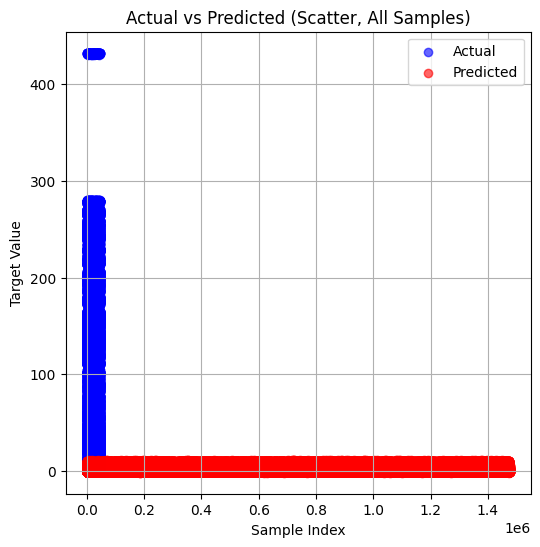

In [84]:
plot_actual_vs_predicted(autoencoder, X_test_scaled, y_test)

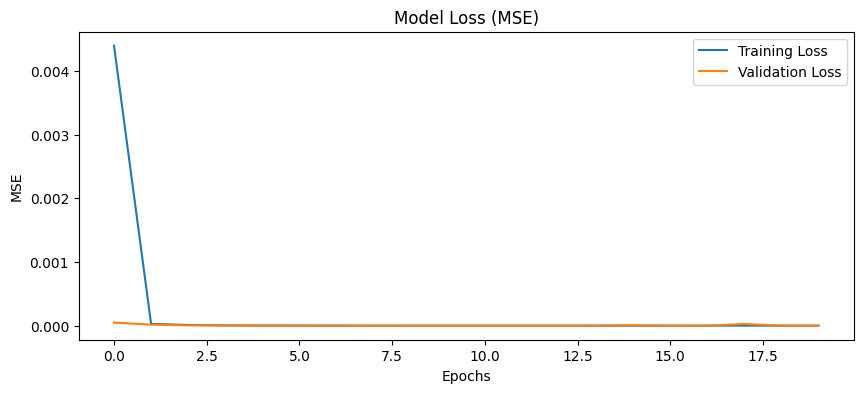

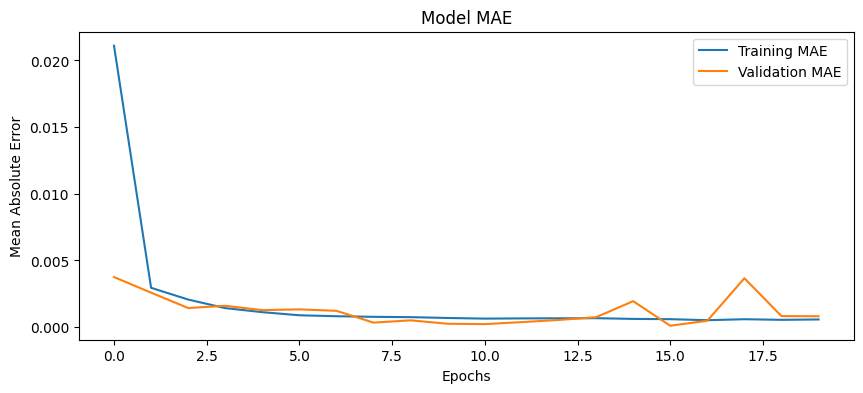

In [91]:
plot_training_history(autoencoder_history)

In [57]:
def build_and_train_finetuned_model(X_train, y_train, X_test, y_test,
                                    encoder, epochs=20, batch_size=32, val_size=0.15):
    """
    Step 2: Fine-tune a regression model using pretrained encoder.
    Evaluates performance on test set.
    """
    # Split again into train/val
    X_train_sub, X_val, y_train_sub, y_val = train_test_split(
        X_train, y_train, test_size=val_size, random_state=42
    )

    # Freeze encoder first
    encoder.trainable = False

    # Build regression model
    model = keras.Sequential([
        encoder,  # pretrained encoder
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(32, activation="relu"),
        layers.Dense(1)  # regression output
    ])

    # Compile
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss="mse",
        metrics=["mae", tf.keras.metrics.RootMeanSquaredError(name="rmse")]
    )

    # Train
    print("\n🔹 Fine-tuning Regression Head (Encoder Frozen)...")
    history = model.fit(
        X_train_sub, y_train_sub,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Optionally unfreeze encoder & fine-tune all layers
    encoder.trainable = True
    print("\n🔹 Unfreezing Encoder and Fine-tuning Entire Model...")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-4),
        loss="mse",
        metrics=["mae", tf.keras.metrics.RootMeanSquaredError(name="rmse")]
    )
    history_ft = model.fit(
        X_train_sub, y_train_sub,
        validation_data=(X_val, y_val),
        epochs=int(epochs/2),
        batch_size=batch_size,
        verbose=1
    )

    # Evaluate on test set
    print("\n📊 Final Evaluation on Test Set:")
    test_results = model.evaluate(X_test, y_test, verbose=0)
    eval_dict = dict(zip(model.metrics_names, test_results))

    # Extra metrics
    y_pred = model.predict(X_test).flatten()
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    accuracy = 100 - mape

    eval_dict["r2"] = r2
    eval_dict["accuracy(1-MAPE)"] = accuracy

    print(eval_dict)

    return history, history_ft, model, eval_dict

In [61]:
# 2. Fine-tune regression model
autoencoder_transfer_history, autoencoder_transfer_history_ft, autoencoder_model, autoencoder_results = build_and_train_finetuned_model(
    X_train_scaled, y_train, X_test_scaled, y_test,
    autoencoder_transfer, epochs=20
)


🔹 Fine-tuning Regression Head (Encoder Frozen)...
Epoch 1/20
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 29s 8ms/step - loss: 4266.3813 - mae: 44.3394 - rmse: 62.5760 - val_loss: 1589.0776 - val_mae: 26.2288 - val_rmse: 39.8632
Epoch 2/20
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 28s 8ms/step - loss: 1976.7272 - mae: 30.1017 - rmse: 44.4572 - val_loss: 1832.8942 - val_mae: 27.4699 - val_rmse: 42.8123
Epoch 3/20
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 28s 8ms/step - loss: 2706.5715 - mae: 37.3640 - rmse: 52.0155 - val_loss: 1715.5248 - val_mae: 26.7015 - val_rmse: 41.4189
Epoch 4/20
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 28s 8ms/step - loss: 2341.8474 - mae: 34.4357 - rmse: 48.3876 - val_loss: 1693.1542 - val_mae: 25.5666 - val_rmse: 41.1480
Epoch 5/20
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 28s 8ms/step - loss: 2173.5032 - mae: 32.6803 - rmse: 46.6183 - val_loss: 1715.7174 - val_mae: 25.9110 - val_rmse: 41.4212
Epoch 6/20
3675/3675 ━━━━━━━━━━━━━━━━━━━━ 28s 8ms/step - loss: 2246.2756 - mae: 33.4038 - rmse: 47.3916 - val_loss: 3387.524

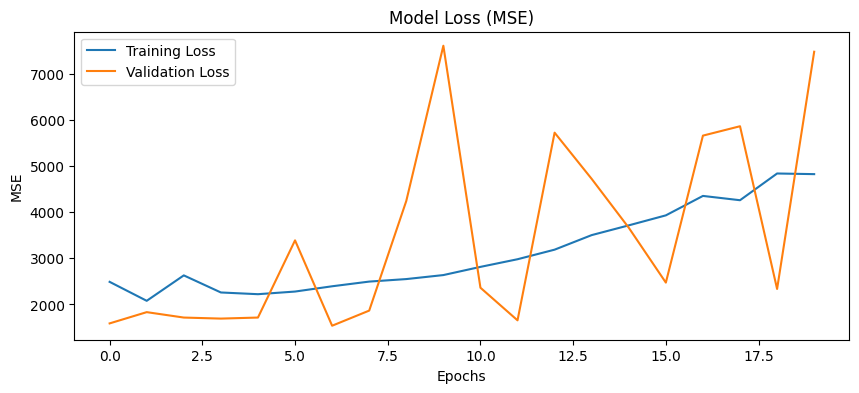

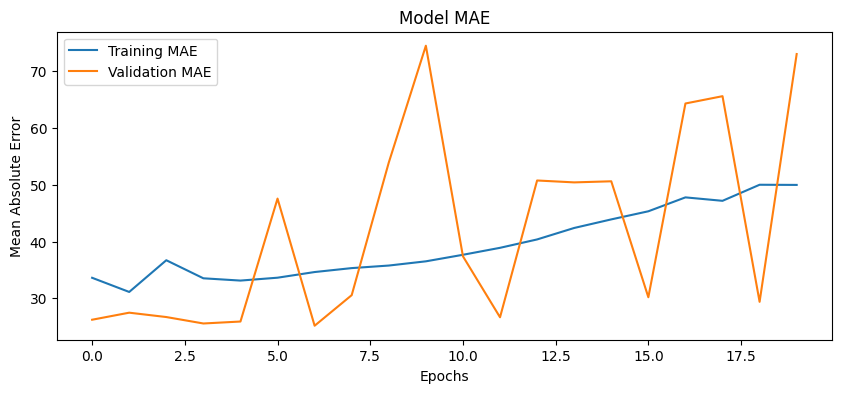

In [63]:
plot_training_history(autoencoder_transfer_history)

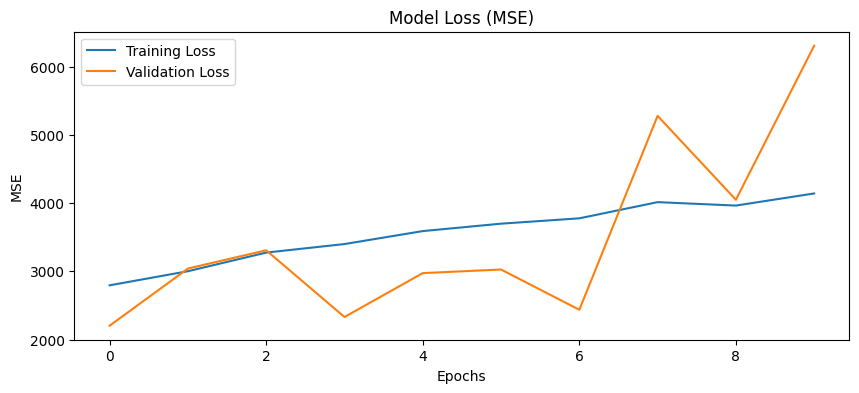

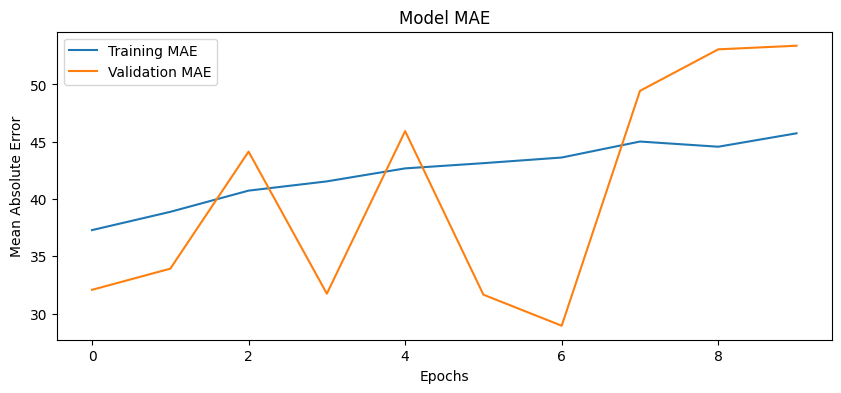

In [64]:
plot_training_history(autoencoder_transfer_history_ft)

## ✅ 📝 6. Conclusion
- Neural networks captured **non-linear dependencies** better than traditional models.
- Forecasting performance shows potential for **real-time energy optimization in data centers**.
- Future work:  
  - Expand with **LSTM/GRU (time-series models)**.  
  - Deploy as an API for real-time prediction.  
  - Incorporate external data like temperature, workload type, and traffic patterns.